In [1]:
from sklearn import datasets

iris = datasets.load_iris()

print(iris.feature_names)
print(iris.data[:10])

from sklearn.decomposition import PCA


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [2]:
pca = PCA(n_components=2).fit(iris.data)

In [3]:
iris_2d = pca.transform(iris.data)

In [5]:
iris_2d[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

In [9]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

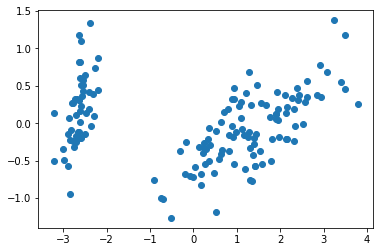

In [12]:
plt.scatter(iris_2d[:,0],iris_2d[:,1])
plt.show()

Oczywiście to nie wskazuje nam na ile klastrów czy też grup możemy podzielić nasze dane !!!


Popatrzcie też, że w celu podziału naszych danych na grupy nie potrzebujemy (i nigdy nie używamy) zmiennej celu !!!
Tutaj wiemy, że mamy 3 grupy - natomiast musimy znaleźć to info bez odnoszenia się do zmiennej celu. 





In [18]:
# pierwsza metoda szukania klastrów - K średnich 
import numpy as np
from sklearn.cluster import KMeans

results = []
# zalozmy ze chcemy przetestowac ilosc klastrow od 1 do 5 

for i in range(1,15):
    print(i)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris.data)
    results.append(kmeans.inertia_) # Cluster sum of squares

1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [19]:
results

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.421674242424245,
 30.064593073593088,
 28.32928392888577,
 26.09294830388911,
 24.851017900228438,
 23.402343575284366,
 21.59846958743011,
 20.26070081878906]

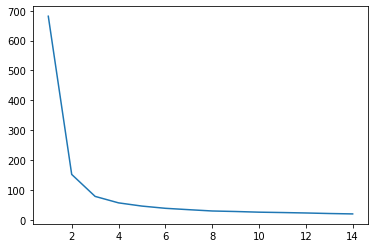

In [20]:
plt.plot(range(1,15),results)
plt.show()

# Czytanie wykresu 

największe zmiany mamy z 1 do 2 oraz z 2 do 3 pozniej juz wszystko jest w miarę stabilne !

- Myślę, że teraz widać to lepiej :D

Czyli szacowalibyśmy liczbę klastrów na 2 lub 3 (ew 4) 


In [22]:
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100)
km_klusters = model.fit_predict(iris.data) # zwraca nam klase do ktorej nalezy dany element
km_klusters # zobaczcie ze pierwsza i druga jest praktycznie separowalna - tak jak bylo to z perceprtonem

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# Zastosowanie biznesowe 

Bardzo ważne aby przed przystąpieniem do analizy (nadzorowanej) wpierw określić na ile różnych grup możemy podzielić zbiór . Dzięki temu zamiast liczyć jeden globalny model możemy policzyć kilka modeli dla różnych grup !!!

- CREDIT SCORING
- GRUPY KLIENTÓW (w sklepach, ubezpieczalniach, leasingach itp itd) 

Czyli jeśli chcemy poznać klientów to clastrowanie jest do tego najlepszą metodą !!! - oczywiście wyniki powinien przeanalizować "ekspert" gdyż można znaleźć grupy, które nijak mają się do rzeczywistych informacji o klientach. 


In [23]:
def plot_cluster(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color=colors[sample], marker=markers[sample] )
    plt.xlabel('Dim 1')
    plt.ylabel('Dim 2')
    plt.title('Assignments')
    plt.show()
    

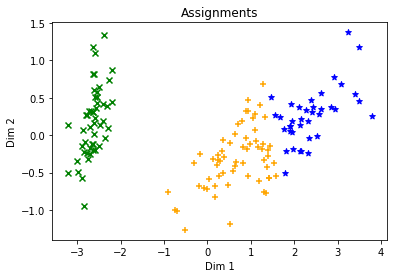

In [25]:
plot_cluster(iris_2d,km_klusters)

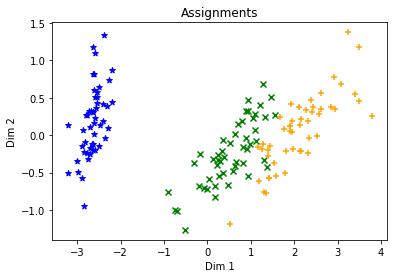

In [27]:
plot_cluster(iris_2d,iris.target) # prawdziwe klastry !!!